# Convertir el excel en dataframe 

In [29]:
# Obtener de los dos archivos excel 
# y juntar las bases de datos en un mismo dataframe
import pandas as pd 
df1 = pd.read_excel('210_SIVIGILA Escritorio_01042008-30042023.xls')
df2 = pd.read_excel('210_SIVIGILAweb_01052023-06082024 (1).xls')
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(5300, 121)

In [30]:
# 2. Ordenar los datos de acuerdo a los atributos de año y semana epidemiológica
df = df.sort_values(by=['año', 'semana'])
df.shape

(5300, 121)

In [31]:
# Detección y eliminación de caracteres no implimibles en el dataset
import re

# Expresión regular para encontrar caracteres no imprimibles
illegal_char_re = re.compile(r'[\x00-\x1F\x7F-\x9F]')

def find_illegal_chars(df):
    for col in df.columns:
        for idx, val in df[col].items():
            if isinstance(val, str) and illegal_char_re.search(val):
                print(f"Carácter ilegal encontrado en fila {idx}, columna '{col}': {repr(val)}")


# corregir aquí 
def remove_illegal_chars(val):
    if isinstance(val, str):
        return illegal_char_re.sub('', val)
    return val

df = df.map(remove_illegal_chars)
df.shape 



(5300, 121)

In [32]:
# contando los diferentes barrios y veredas que hay en el dataset original 
df.bar_ver_.value_counts()

bar_ver_
9999999 SIN INFORMAC    203
PUEBLO NUEVO            181
ASOVIVIENDA             119
SIN DATO                 59
EL TRIANGULO             49
                       ... 
ALTOS DEL COUNTRY         1
BARRIO PORVENIR           1
BARRIO COSTA DE ORO       1
HACIENDA LA URIBE         1
BR PAJONAL                1
Name: count, Length: 463, dtype: int64

In [33]:
lista_barrios_correctos = ['PUEBLO NUEVO', 'CENTENARIO', \
                          'LAS VILLAS', 'EL TRIÁNGULO', 'EL BOSQUE', \
                          'PUEBLO SANTO', 'LOS ALMENDROS', 'EL DROMEDARIO', \
                          'EL CENTRO', 'VILLA ARABIA', 'CARACOLÍ', \
                          'VILLA GRANDA', 'ASOVIVIENDA', 'EL KENNEDY', \
                          'CLEMENTE ARRIETA', 'EL ÁGUILA', 'EL POBLADO', \
                          'SANTA ELENA', 'EL CAMELLO', 'LA ESPERANZA', \
                          'EL PRADO', 'SAN MIGUEL', 'SAN RAFAEL', \
                          'LA PAZ', 'LAS MALVINAS', 'EL CARMEN', \
                          'NUEVA ESTRELLA', 'LOMA FRESCA', 'EL ROBLE', \
                          'LA COLOMBIANITA', 'PARAGUAY', 'LA YE', \
                          'ALTOS DE SAN JUAN', 'PUERTO ESPAÑA', 'EL PALMAR', \
                          'LAS GAVIOTAS', 'ALTOS DE KIRIQUI', 'CASTILLITO', \
                          'LOS CÓRDOBA', 'EL LAGO', 'BUENO AIRES', \
                          'PEDRO VALDIVIA', 'SIN INFORMACION']


In [34]:
len(lista_barrios_correctos) 

43

In [35]:
# cuantos datos nulos hay en ell atributo bar_ver_
df['bar_ver_'].isnull().sum() 

np.int64(3125)

In [36]:
# llene los datos faltantes con la cadena SIN INFORMACION
df['bar_ver_'] = df['bar_ver_'].fillna('SIN INFORMACION') 

In [37]:
df['bar_ver_'].isnull().sum() 

np.int64(0)

In [38]:
# reemplazar los barrios mal copiados por nombres de barrios correctos
import pandas as pd
from difflib import get_close_matches

# Lista de barrios correctos
lista_barrios_correctos = ['PUEBLO NUEVO', 'CENTENARIO', 'LAS VILLAS', 'EL TRIÁNGULO', 'EL BOSQUE', 
                           'PUEBLO SANTO', 'LOS ALMENDROS', 'EL DROMEDARIO', 'EL CENTRO', 
                           'VILLA ARABIA', 'CARACOLÍ', 'VILLA GRANDA', 'ASOVIVIENDA', 
                           'EL KENNEDY', 'CLEMENTE ARRIETA', 'EL ÁGUILA', 'EL POBLADO', 
                           'SANTA ELENA', 'EL CAMELLO', 'LA ESPERANZA', 'EL PRADO', 
                           'SAN MIGUEL', 'SAN RAFAEL', 'LA PAZ', 'LAS MALVINAS', 
                           'EL CARMEN', 'NUEVA ESTRELLA', 'LOMA FRESCA', 'EL ROBLE', 
                           'LA COLOMBIANITA', 'PARAGUAY', 'LA YE', 'ALTOS DE SAN JUAN', 
                           'PUERTO ESPAÑA', 'EL PALMAR', 'LAS GAVIOTAS', 'ALTOS DE KIRIQUI', 
                           'CASTILLITO', 'LOS CÓRDOBA', 'EL LAGO', 'BUENO AIRES', 
                           'PEDRO VALDIVIA', 'SIN INFORMACION']

def corregir_barrios(nombre):
    if pd.isnull(nombre):
        return 'SIN INFORMACION'
    
    # Convertir a cadena de texto
    nombre = str(nombre).strip().upper()
    
    coincidencias = get_close_matches(nombre, lista_barrios_correctos, n=1, cutoff=0.8)
    if coincidencias:
        return coincidencias[0]
    else:
        return 'SIN INFORMACION'

# Aplicar la corrección a la columna 'bar_ver'
df['bar_ver_corregido'] = df['bar_ver_'].apply(corregir_barrios)

In [39]:
# verificación de la corrección del atributo bar_ver_  

len(df.bar_ver_corregido.value_counts())

40

In [40]:
# eliminar casos repetidos 
lista_atributos_criterio_igualdad = ['fec_not', 'semana', 'año','edad_',\
                                      'sexo_',\
                                      'bar_ver_corregido',\
                                          'telefono_', 'fecha_nto_']
df = df.drop_duplicates(subset=lista_atributos_criterio_igualdad)
df.shape 

(5240, 122)

In [41]:
# convertir el dataframe con los datos eliminados en un excel
df.to_excel('datos_secretaria_con_casos_repetidos_eliminados.xlsx', index=False) 

In [ ]:
# Tarea: Construir un dataframe df3 con solo dos columnas: 
# 1. Una es semana epidemiológica por año
# 2. números de casos 

# Visualización  



Text(0, 0.5, 'casos')

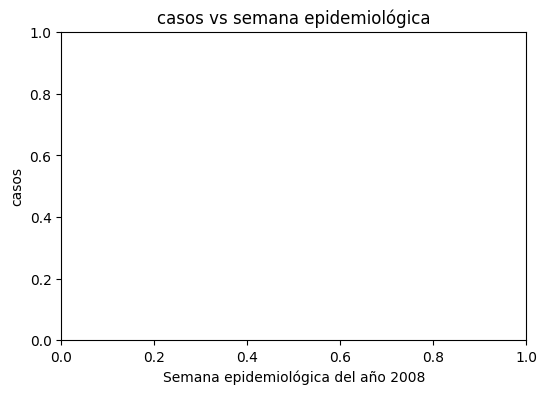

In [44]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,4))
plt.title('casos vs semana epidemiológica')
plt.xlabel('Semana epidemiológica del año 2008')
plt.ylabel('casos') 

plt.plot(df.semana[df.año == 2008], df )



In [ ]:
df.sema